In [3]:
import os
os.chdir("C:/Users/unsty/Desktop")


In [5]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error ,mean_squared_log_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('updated_excel1.csv',parse_dates=["saledate"],dtype={'Grouser_Tracks':'object','fiBaseModel':'object','Coupler_System':'object',"fiModelSeries":str,'fiModelDesc': str,"Tire_Size":str,'Hydraulics_Flow':str,'fiModelDesc':object})
TE=pd.read_csv('Test.csv',parse_dates=["saledate"], dtype={'Grouser_Tracks':'object','fiBaseModel':'object','Coupler_System':'object',"fiModelSeries":str,'fiModelDesc': str,"Tire_Size":str,'Hydraulics_Flow':str,'fiModelDesc':object})


In [7]:
da=data.copy()

In [ ]:
use this function to add more features to main data

In [13]:
data.MachineHoursCurrentMeter.head(20)

0        68.0
1      4640.0
2      2838.0
3      3486.0
4       722.0
5       508.0
6     11540.0
7      4883.0
8       302.0
9     20700.0
10     1414.0
11     2764.0
12        0.0
13     1921.0
14      320.0
15     2450.0
16     1972.0
17        0.0
18      994.0
19     8005.0
Name: MachineHoursCurrentMeter, dtype: float64

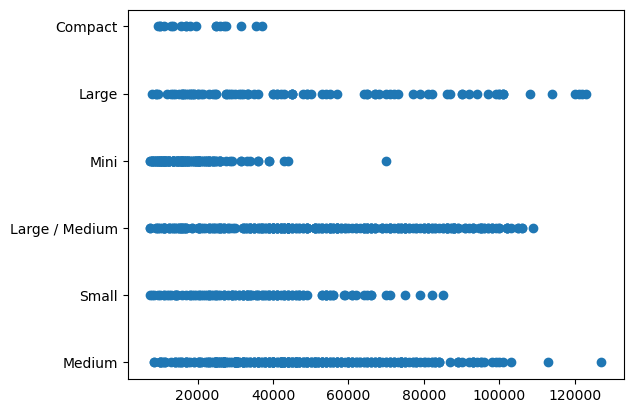

In [15]:
fig,ax=plt.subplots()
ax.scatter(data["SalePrice"][data.ProductSize.notna()][:1000], data["ProductSize"][data.ProductSize.notna()][:1000])

<Axes: ylabel='Frequency'>

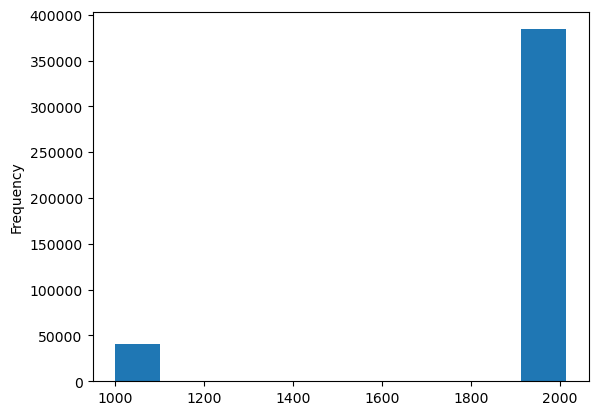

In [17]:
data.YearMade.plot.hist()

In [19]:
data.YearMade.unique()

array([2004, 1996, 2001, 2007, 1993, 2008, 1000, 1998, 1999, 2003, 1991,
       2000, 2005, 1995, 2006, 2002, 1984, 1988, 1980, 1992, 1987, 1997,
       1971, 1978, 1989, 1985, 1979, 1976, 1994, 1982, 1990, 1974, 1968,
       1966, 1983, 1986, 1981, 1970, 1977, 1975, 1973, 1965, 1967, 2009,
       2010, 1969, 1972, 1964, 1957, 1958, 1963, 1919, 1920, 1950, 1948,
       1952, 1942, 1956, 1954, 1953, 1955, 1959, 1960, 1961, 1962, 1951,
       1937, 1949, 1947, 2012, 2013, 2011, 2014, 1900], dtype=int64)

In [23]:
data.sort_values(by=["saledate"],inplace=True,ascending=True)
data.saledate.head(20)

205615   1989-01-17
76171    1989-01-31
169757   1989-01-31
115892   1989-01-31
98567    1989-01-31
127000   1989-01-31
28820    1989-01-31
101796   1989-01-31
75832    1989-01-31
55455    1989-01-31
92256    1989-01-31
115957   1989-01-31
92294    1989-01-31
92301    1989-01-31
55454    1989-01-31
127132   1989-01-31
81383    1989-01-31
142491   1989-01-31
54181    1989-01-31
28603    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [25]:
data.MachineHoursCurrentMeter.unique()

array([   nan,  1011.,  5439., ...,  8004., 32059.,  8401.])

In [21]:
da["saleYear"] = da.saledate.dt.year
da["saleMonth"] = da.saledate.dt.month
da["saleDay"] = da.saledate.dt.day
da["saleDayofweek"] = da.saledate.dt.dayofweek
da["saleDayofyear"] = da.saledate.dt.dayofyear


In [27]:
da.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
saleYear,2006,2004,2004,2011,2009
saleMonth,11,3,2,5,7
saleDay,16,26,26,19,23
saleDayofweek,3,4,3,3,3


In [29]:
da.state.value_counts()

state
Florida           68419
Texas             55262
California        30631
Washington        16623
Georgia           15196
Maryland          13874
Mississippi       13483
Ohio              12666
Illinois          12009
Colorado          11800
New Jersey        11404
North Carolina    11047
Tennessee         10711
Pennsylvania      10562
Alabama           10459
South Carolina    10018
Arizona            9737
New York           8866
Connecticut        8501
Minnesota          8008
Missouri           7514
Nevada             7176
Louisiana          6959
Kentucky           5526
Maine              5106
Indiana            4197
Arkansas           4049
New Mexico         3670
Utah               3172
Wisconsin          2889
New Hampshire      2806
Unspecified        2801
Virginia           2507
Idaho              2106
Michigan           2041
Oregon             1976
Wyoming            1736
Montana            1467
Iowa               1441
Oklahoma           1403
West Virginia       936
Nebraska  

In [31]:
company_mapping = {
    "Backhoe Loader": "Backhoe Loader",
    "Track Type Tractor": "Track Type Tractor",
    "Hydraulic Excavator": "Hydraulic Excavator",
    "Skid Steer Loader": "Skid Steer Loader",
    "Motorgrader": "Motorgrader"
}

product_size_mapping = {
    "Motorgrader - 145.0 to 170.0 Horsepower": "Medium",
    "Motorgrader - 45.0 to 130.0 Horsepower": "Small",
    "Motorgrader - 130.0 to 145.0 Horsepower": "Medium",
    "Motorgrader - 170.0 to 200.0 Horsepower": "Large",
    "Motorgrader - 200.0 + Horsepower": "Large",
    "Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth": "Medium",
    "Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth": "Large / Medium",
    "Backhoe Loader - 16.0 + Ft Standard Digging Depth": "Large",
    "Backhoe Loader - 0.0 to 14.0 Ft Standard Digging Depth": "Medium",

}

horsepower_mapping = {
    "Wheel Loader - 100.0 to 110.0 Horsepower": 110,
    "Wheel Loader - 90.0 to 100.0 Horsepower": 100,
    "Wheel Loader - 80.0 to 90.0 Horsepower": 90,
    "Wheel Loader - 60.0 to 80.0 Horsepower": 80,
    "Wheel Loader - 40.0 to 60.0 Horsepower": 60,

}

# Update 'company'
for key, value in company_mapping.items():
    da.loc[da.fiProductClassDesc.str.contains(key), 'company'] = value

# Update 'ProductSize'
for key, value in product_size_mapping.items():
    da.loc[da.fiProductClassDesc == key, 'ProductSize'] = value

# Update 'horsepower'
for key, value in horsepower_mapping.items():
    da.loc[da.fiProductClassDesc == key, 'horsepower'] = value

In [33]:
for label,value in da.items():
   if pd.api.types.is_string_dtype(value) or pd.api.types.is_object_dtype(value) and label!="ProductSize":
          print(label)

UsageBand
fiModelDesc
fiBaseModel
fiModelSeries
fiModelDescriptor
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
fiManufacturerDesc
PrimarySizeBasis
company


In [35]:
for label,value in da.items():
    if pd.api.types.is_string_dtype(value) or pd.api.types.is_object_dtype(value) :
        da[label] = value.astype("category").cat.as_ordered()


In [37]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425155 entries, 0 to 425154
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   425155 non-null  int64         
 1   SalePrice                 425155 non-null  float64       
 2   MachineID                 425155 non-null  int64         
 3   ModelID                   425155 non-null  int64         
 4   datasource                425155 non-null  int64         
 5   auctioneerID              405019 non-null  float64       
 6   YearMade                  425155 non-null  int64         
 7   MachineHoursCurrentMeter  149633 non-null  float64       
 8   UsageBand                 75504 non-null   category      
 9   saledate                  425155 non-null  datetime64[ns]
 10  fiModelDesc               425155 non-null  category      
 11  fiBaseModel               425155 non-null  category      
 12  fi

In [39]:
for label, value in da.items():
    if pd.api.types.is_numeric_dtype(value):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
fiSecondaryDesc
MfgYear
fiManufacturerID
PrimaryLower
PrimaryUpper
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear
horsepower


In [41]:
da.fiModelDesc

0             521D
1           950FII
2              226
3         PC120-6E
4             S175
            ...   
425150       80NX3
425151         28N
425152         35N
425153         35N
425154        55N2
Name: fiModelDesc, Length: 425155, dtype: category
Categories (5132, object): ['100C' < '104' < '1066' < '1066E' ... 'ZX800' < 'ZX800LC' < 'ZX80LCK' < 'ZX850H']

In [43]:
for label, value in da.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(value) :
        da[label] = pd.Categorical(value).codes+1

getting rid of outliers and scale up our data

In [45]:
import numpy as np
from  sklearn.neighbors  import  LocalOutlierFactor
for label, value in da.items():
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.impute import SimpleImputer
    mi=MinMaxScaler()
    lo=LocalOutlierFactor()
    si=SimpleImputer(strategy='constant')
    if pd.api.types.is_numeric_dtype(value) and label not in ["SalePrice","saleDayofyear","saleDayofweek","saleDay","saleMonth","saleYear",'SalesID']:
        mi.fit(np.reshape(da[label],[-1,1]))

        da[label]=mi.transform(np.reshape(da[label],[-1,1]))
        if pd.isnull(value).sum():
           si.fit(np.reshape(da[label],[-1,1]))
           da[label]=si.transform(np.reshape(da[label],[-1,1]))

mask=lo.fit_predict(da[ [i for i in da.columns if pd.api.types.is_numeric_dtype(da[i])]])

In [46]:
mask=mask!=-1


In [47]:
da=da[mask]


In [48]:

da_val=da[da.saleYear ==2012].drop(columns=["saledate"])
da_val=da_val[~da_val.SalesID.isin(TE.SalesID)]
da_train = da[da.saleYear !=2012].drop(columns=["saledate"])
X_train, y_train = da_train.drop("SalePrice", axis=1), da_train.SalePrice
X_valid, y_valid = da_val.drop("SalePrice", axis=1), da_val.SalePrice


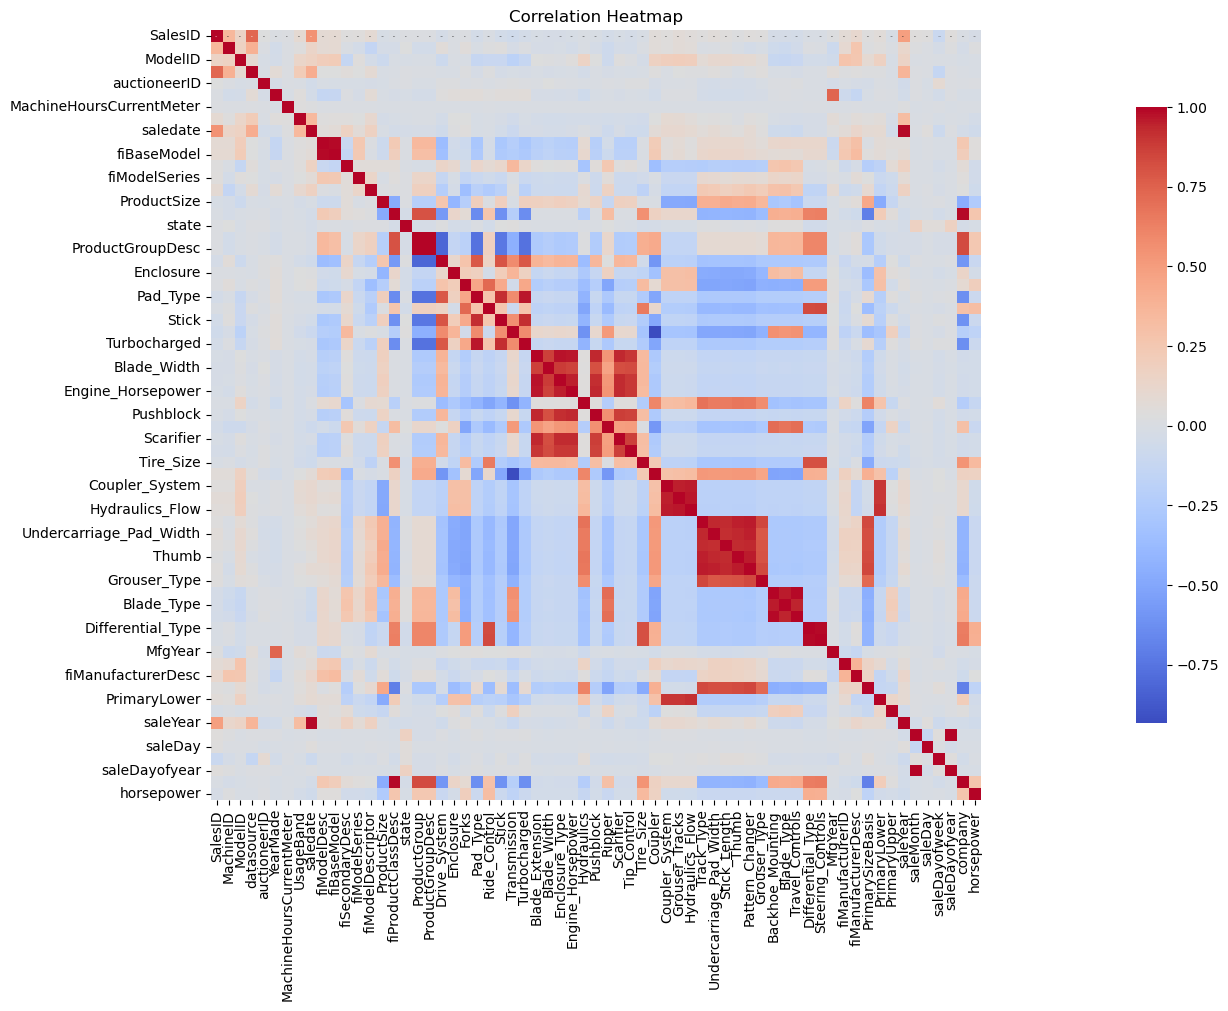

In [49]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



correlation_matrix = da.drop(columns=['SalePrice']).corr()


plt.figure(figsize=(40, 10))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 1})


plt.title('Correlation Heatmap')


plt.show()

In [50]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    print(train_preds)
    val_preds = model.predict(X_valid)

    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [51]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,PrimarySizeBasis,PrimaryLower,PrimaryUpper,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,company,horsepower
0,1139246,0.390489,0.084181,0.000000,0.030303,0.990138,0.000002,0.666667,0.190411,0.150228,...,0.25,0.00440,0.000118,2006,11,16,3,320,1.0,0.0
1,1139248,0.045986,0.001318,0.000000,0.030303,0.982249,0.000149,0.666667,0.345157,0.268083,...,0.25,0.00600,0.000173,2004,3,26,4,86,1.0,0.0
2,1139249,0.169943,0.187813,0.000000,0.030303,0.987179,0.000091,0.333333,0.065484,0.055640,...,0.50,0.05404,0.001599,2004,2,26,3,57,0.6,0.0
3,1139251,0.401191,0.008179,0.000000,0.030303,0.987179,0.000112,0.333333,0.734555,0.703591,...,0.25,0.00900,0.000248,2011,5,19,3,139,0.2,0.0
4,1139253,0.413269,0.464972,0.000000,0.030303,0.993097,0.000023,1.000000,0.842526,0.784522,...,0.50,0.06404,0.001749,2009,7,23,3,204,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401117,6333307,0.712021,0.575975,0.538462,0.020202,0.991124,0.000000,0.000000,0.131164,0.105210,...,1.00,0.00012,0.000002,2011,10,25,1,298,0.2,0.0
401118,6333311,0.714802,0.575975,0.538462,0.020202,0.992110,0.000000,0.000000,0.131164,0.105210,...,1.00,0.00012,0.000002,2011,10,25,1,298,0.2,0.0
401120,6333336,0.719430,0.576029,0.538462,0.010101,0.991124,0.000000,0.000000,0.131553,0.105210,...,1.00,0.00008,0.000001,2011,11,2,2,306,0.2,0.0
401121,6333337,0.715431,0.576029,0.538462,0.010101,0.991124,0.000000,0.000000,0.131553,0.105210,...,1.00,0.00012,0.000002,2011,11,2,2,306,0.2,0.0


In [52]:
import lightgbm
lgm=lightgbm.LGBMRegressor(random_state=42,n_jobs=-1,colsample_bytree=0.8,learning_rate=0.015,reg_alpha=0.25,reg_lambda=2,n_estimators=100,verbosity=2,num_leaves=500)
lgm.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_valid, y_valid)])
train_preds = lgm.predict(X_train)
val_preds = lgm.predict(X_valid)


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.868673
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.276952
[LightGBM] [Debug] init for col-wise cost 0.026980 seconds, init for row-wise cost 0.139939 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2996
[LightGBM] [Info] Number of data points in the train set: 394381, number of used features: 64
[LightGBM] [Info] Start training from score 31053.933579
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug]

In [53]:
rmsle(y_valid, val_preds)

0.3538973736224411

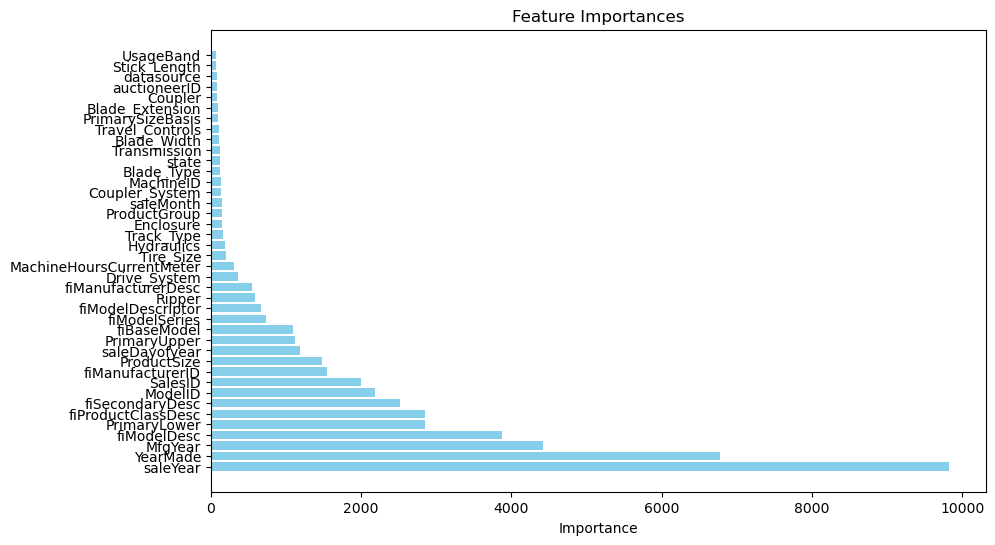

In [54]:
importances = lgm.feature_importances_


# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': da.drop(columns=["saledate","SalePrice"]).columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)[:40]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [60]:
import lightgbm
lgm=lightgbm.LGBMRegressor(random_state=42,n_jobs=-1,colsample_bytree=0.8,learning_rate=0.005,reg_alpha=0.025,reg_lambda=2,n_estimators=15000,verbosity=2,num_leaves=500)
lgm.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_valid, y_valid)])
train_preds = lgm.predict(X_train)
val_preds = lgm.predict(X_valid)
rmsle(y_valid, val_preds)

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.868673
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.276952
[LightGBM] [Debug] init for col-wise cost 0.251594 seconds, init for row-wise cost 0.486668 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.606825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2996
[LightGBM] [Info] Number of data points in the train set: 394381, number of used features: 64
[LightGBM] [Info] Start training from score 31053.933579
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth

0.2324563423404749

In [61]:
rmsle(y_valid, val_preds)

0.2324563423404749

In [88]:
from sklearn.ensemble import RandomForestRegressor
ideal_model = RandomForestRegressor(n_estimators=500,
                                    max_features=0.9)
ideal_model.fit(X_train, y_train)



RandomForestRegressor(max_features=0.9, n_estimators=500)

In [89]:
train_preds = ideal_model.predict(X_train)
val_preds1 = ideal_model.predict(X_valid)


In [90]:
rmsle(y_valid,val_preds1)

0.24914575016494114

In [80]:

rmsle(y_valid,val_preds1*0.2+ val_preds*0.8)

0.2317339329601525

In [164]:
print(lgm.feature_importances_)
feature_names = da1.drop(columns=['SalePrice']).columns
feature_importances = lgm.feature_importances_
import numpy as np
print(len(feature_names))
top_indices = np.argsort(feature_importances)[-30:]
top_feature_labels = feature_names[top_indices]
sorted_indices = np.argsort(feature_importances[top_indices])[::-1]
top_feature_labels_sorted = top_feature_labels[sorted_indices]
print(top_feature_labels_sorted)
print(da1.columns)

[382123 692277 286681  10103 162233 333547 163554  25118 272375  99875
 138324  50561  61016  49539 150222 343807   8944   1905  12034  82371
  14584   2342   9787   8469  25699   1405   1586  11011   5207    901
  40160   3826  29853   4894   5795  49198  32503   1255    734    685
   9455  34265  41742  23655   4865  10388   1476  44244  17202   3632
   1732 264590  42199  40197   5501 154690  80036 327815 125121 414224
 162817 517337    751  83563]
65
Index(['MachineID', 'saleDayofweek', 'saleMonth', 'SalesID',
       'fiProductClassDesc', 'YearMade', 'PrimaryUpper', 'ModelID', 'saledate',
       'Steering_Controls', 'MachineHoursCurrentMeter', 'saleDay',
       'auctioneerID', 'PrimarySizeBasis', 'ProductSize', 'fiBaseModel',
       'saleYear', 'fiModelDesc', 'company', 'Drive_System', 'PrimaryLower',
       'fiModelSeries', 'fiSecondaryDesc', 'fiModelDescriptor', 'Tip_Control',
       'Backhoe_Mounting', 'MfgYear', 'Undercarriage_Pad_Width',
       'fiManufacturerID', 'Engine_Hors